# Setup

Import WebMO and set up username and password.

In [1]:
import webmo
from pprint import pprint # this lets us print good JSON in a readable manner

Check the library version.

In [2]:
webmo.__version__

'1.1.4'

Set the WebMO URL and our username.

In [3]:
URL = "https://server.university.edu/~webmo/cgi-bin/webmo/rest.cgi"
uname = "smith"

Finally, start the WebMO REST session.

In [4]:
rest = webmo.WebMOREST(URL, username=uname)

Enter WebMO password for user smith: ········


# Admin Functions

## Get Users

In [5]:
?rest.get_users

Signature: rest.get_users()
Docstring:
Fetches a list of available WebMO users

This call returns a list of available WebMO users. For non-administrative users, this will be
only the current authenticated user. For group administrators, this call will return all users
in the group. For system administrators, this call will return all system users.

Returns:
    A list of users
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [6]:
rest.get_users()

['smith']

## Get Folders

In [7]:
?rest.get_folders

Signature: rest.get_folders(target_user='')
Docstring:
Fetches a list of folders owned by the current user or the specified target user

This call returns a list of available folders. Administrative users must specify the target user,
otherwise the folders owned by the current user are returned.

Arguments:
    target_user(str, optional): The target username whose folders are retrieved. Otherwise, uses the authenticated user.

Returns:
    A list of folders
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [8]:
rest.get_folders()

{'trash': -1, 'test1': 1, 'inbox': 0, 'test2': 2}

## Delete Job

In [9]:
?rest.delete_job

Signature: rest.delete_job(job_number)
Docstring:
Permanently deletes a WebMO job 

This call deletes the specified job.

Arguments:
    job_number(int): The job to delete
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [10]:
try:
    rest.delete_job(12)
except:
    print("this job does not exist")

this job does not exist


## Group Info

In [11]:
?rest.get_groups

Signature: rest.get_groups()
Docstring:
Fetches a list of available WebMO groups

This call returns a list of available WebMO groups. For non-administrative users, this will be
only the current authenticated group. For system administrators, this call will return all system groups.

Returns:
    A list of groups
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [12]:
?rest.get_group_info

Signature: rest.get_group_info(groupname)
Docstring:
Returns information about the specified group

This call returns a JSON formatted string summarizing information about the requested group. For non-
administrative users, only requests for the authenticated group will be accepted.

Arguments:
    groupname(str): The groupname about whom to return information
    
Returns:
    A JSON formatted string summarizing the group information
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [13]:
pprint(rest.get_groups())
pprint(rest.get_group_info("webmo"))

['webmo']
{'group': 'webmo',
 'members': ['admin', 'smith', 'jones'],
 'properties': {'allowNewUsers': '1',
                'enabledInterfaces': 'all',
                'enabledQueues': 'all',
                'enabledServers': 'all',
                'jobTimeLimit': '-1',
                'timeLimit': '-1'}}


## Job Archives

In [14]:
?rest.get_job_archive

Signature: rest.get_job_archive(job_number)
Docstring:
Returns a WebMO archive from the specified job.

This call generates and returns a binary WebMO archive (tar/zip) file from the specified job.

Arguments:
    job_number(int): The job about whom to generate the archive
    
Returns:
    The raw data (as a string) of the WebMO archive, appropriate for saving to disk
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [15]:
rest.get_job_archive(11)[0:100]

'\x1f�\x08\x00?��e\x00\x03�[�W㸒���+tf�tߛ\x18K~�=�\x00\t\x01�\x06z\t��سg�qD���\x19ہN���+�\u038b��\x19�gw.:��RU�T�*UINrY~�_Ҽ�Iw8����(\x16����}�Z�n'

# Job Functions

## Job Geometries

In [16]:
?rest.get_job_geometry

Signature: rest.get_job_geometry(job_number)
Docstring:
Returns the final optimized geometry from the specified job.

This call returns an XYZ formatted file of the final optimized geometry from the specified job.

Arguments:
    job_number(int): The job about whom to return information
    
Returns:
    A string containing XYZ formatted optimized geometry
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [17]:
print(rest.get_job_geometry(11))

6 -0.000000 0.000000 -0.519493
8 0.000000 -0.000000 0.664770
1 -0.000000 0.924106 -1.100601
1 -0.000000 -0.924106 -1.100601



## Generalized Job Info

In [18]:
?rest.get_job_info

Signature: rest.get_job_info(job_number)
Docstring:
Returns information about the specified job

This call returns a JSON formatted string summarizing basic information about the requested job.

Arguments:
    job_number(int): The job about whom to return information
    
Returns:
    A JSON formatted string summarizing the job information
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [19]:
pprint(rest.get_job_info(11))

{'jobNumber': 11,
 'properties': {'checkpointFile': 0,
                'cpu_time': 1.20000004768372,
                'failureCode': 0,
                'folderID': 0,
                'jobDate': '10/20/2023 10:23',
                'jobDescription': 'Molecular Orbitals',
                'jobEngine': 'gaussian',
                'jobGroup': 'webmo',
                'jobName': 'CH2O',
                'jobNumber': 11,
                'jobStatus': 'complete',
                'jobUser': 'smith',
                'pid': 26448,
                'server': 'buchner.chem.hope.edu'}}


## Output Files

In [20]:
?rest.get_job_output

Signature: rest.get_job_output(job_number)
Docstring:
Returns the raw text output from the specified job.

This call returns the textual raw output file from the specified job.

Arguments:
    job_number(int): The job about whom to return information
    
Returns:
    A string containing the contents of the raw output file
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [21]:
print(rest.get_job_output(11)[0:1000])

 Entering Gaussian System, Link 0=/usr/local/g16/g16
 Initial command:
 /usr/local/g16/l1.exe "/scratch/webmo-30300/11/Gau-26448.inp" -scrdir="/scratch/webmo-30300/11/"
 Entering Link 1 = /usr/local/g16/l1.exe PID=     26449.
  
 Copyright (c) 1988-2019, Gaussian, Inc.  All Rights Reserved.
  
 This is part of the Gaussian(R) 16 program.  It is based on
 the Gaussian(R) 09 system (copyright 2009, Gaussian, Inc.),
 the Gaussian(R) 03 system (copyright 2003, Gaussian, Inc.),
 the Gaussian(R) 98 system (copyright 1998, Gaussian, Inc.),
 the Gaussian(R) 94 system (copyright 1995, Gaussian, Inc.),
 the Gaussian 92(TM) system (copyright 1992, Gaussian, Inc.),
 the Gaussian 90(TM) system (copyright 1990, Gaussian, Inc.),
 the Gaussian 88(TM) system (copyright 1988, Gaussian, Inc.),
 the Gaussian 86(TM) system (copyright 1986, Carnegie Mellon
 University), and the Gaussian 82(TM) system (copyright 1983,
 Carnegie Mellon University). Gaussian is a federally registered
 trademark of Gaussian, In

## Job Results

In [22]:
?rest.get_job_results

Signature: rest.get_job_results(job_number)
Docstring:
Returns detailed results of the calculation (e.g. energy, properties) from the specified job.

This call returns a JSON formatted string summarize all of the calculated and parsed properties
from the specified job. This information is normally summarized on the View Job page.

Arguments:
    job_number(int): The job about whom to return information
    
Returns:
    A JSON formatted string summarizing the calculated properties
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [23]:
str(rest.get_job_results(11))[:1000]

"{'success': True, 'molecular_multiplicity': 1, 'connectivity': [[1, 2, 2], [1, 3, 1], [1, 4, 1]], 'provenance': {'creator': 'Gaussian'}, 'molecular_charge': 0, 'schema_name': 'QC_JSON', 'properties': {'rhf_energy': {'value': -113.866331244, 'units': 'Hartree'}, 'partial_charges': {'mulliken': [0.134657, -0.415652, 0.140497, 0.140497]}, 'rotational_constants': [293.6016424, 40.141007, 35.3130341], 'route': ' #N HF/6-31G(d) SP GFINPUT POP=FULL Geom=Connectivity', 'scf_dipole_moment': [0, 0, 2.6658], 'orbitals': {'symmetry': [['A1', 'A1', 'A1', 'A1', 'B2', 'A1', 'B1', 'B2', 'B1', 'A1', 'B2', 'A1', 'B1', 'A1', 'B2', 'A1', 'B2', 'A1', 'A1', 'B1', 'B2', 'A1', 'A2', 'B1', 'A1', 'B2', 'A2', 'A1', 'A1', 'B1', 'B2', 'A1', 'A1', 'A1']], 'occupancy': [[2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'energies': [[-20.58309, -11.33666, -1.41739, -0.86825, -0.6974, -0.65286, -0.54022, -0.43545, 0.14586, 0.24989, 0.33949, 0.37502, 0.73281, 0.82

## Job List

In [24]:
?rest.get_jobs

Signature:
rest.get_jobs(
    engine='',
    status='',
    folder_id='',
    job_name='',
    target_user='',
)
Docstring:
Fetches a list of jobs satisfying the specified filter criteria

This call returns a list of available jobs owned by the current user or (for administrative users)
the specified target user AND the specified filter criteria.

Arguements:
    engine(str, optional): Filter by specified computational engine
    status(str, optional): Filter by job status
    folder_id(str, optional): Filter by folder ID (not name!)
    target_user(str, optional): The target username whose jobs are retrieved. Otherwise, uses the authenticated user.

Returns:
    A list of jobs meeting the specified criteria
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [25]:
rest.get_jobs()[:10]

[331, 330, 329, 328, 327, 326, 325, 324, 323, 321]

## Get User Info

In [26]:
?rest.get_user_info

Signature: rest.get_user_info(username)
Docstring:
Returns information about the specified user

This call returns a JSON formatted string summarizing information about the requested user. For non-
administrative users, only requests for the authenticated user will be accepted.

Arguments:
    username(str): The username about whom to return information
    
Returns:
    A JSON formatted string summarizing the user information
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [27]:
pprint(rest.get_user_info(uname))

{'admin': False,
 'properties': {'allowNewUsers': '1',
                'email': 'caleb.brzezinski@hope.edu',
                'emailNotification': '0',
                'enabledInterfaces': 'all',
                'enabledQueues': 'all',
                'enabledServers': 'all',
                'folders': '1,test1:2,test2',
                'fullName': 'Caleb Brzezinski',
                'jobLimit': 'group',
                'jobTimeLimit': '-1',
                'timeLimit': '-1',
                'viewJobInNewWindow': '0'},
 'user': 'smith'}


## Import Jobs

In [28]:
?rest.import_job

Signature: rest.import_job(job_name, filename, engine)
Docstring:
Imports an existing output file into WebMO

This call imports an existing computational output file, parsing the output and creating a newly
WebMO job.

Arguments:
    job_name(str): The name of the new WebMO job
    filename(str): The filename (full path) of an existing output file to import
    engine(str): The name of the computational engine
    
Returns:
    The the job number of the new job, upon success
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [29]:
# commented as there's no easy way to package a second file with this
# n = rest.import_job("some test 笑笑笑笑", filename, "gaussian")

## Submit Jobs

In [30]:
?rest.submit_job

Signature: rest.submit_job(job_name, input_file_contents, engine, queue=None)
Docstring:
Submits and executes a new WebMO job

This call submits and executes a new job to a computational engine, generating a new WebMO job.

Arguments:
    job_name(str): The name of the new WebMO job
    input_file_contents(str): The contents of a valid input file to submit to a computational engine
    engine(str): The name of the computational engine
    
Returns:
    The the job number of the new job, upon success
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [31]:
input = """
#N HF/6-31G(d) SP GFINPUT POP=FULL

CH2O MOs

0 1
C 
O 1 B1
H 1 B2 2 A1
H 1 B3 2 A2 3 D1

B1 1.184263000
B2 1.091631076
B3 1.091631076
A1 122.1630209
A2 122.1630209
D1 180.0000000
"""
n = rest.submit_job("コムプケム大好き", input, "gaussian")

## Delete Jobs

In [32]:
?rest.delete_job

Signature: rest.delete_job(job_number)
Docstring:
Permanently deletes a WebMO job 

This call deletes the specified job.

Arguments:
    job_number(int): The job to delete
File:      /usr/local/Cellar/jupyterlab/4.0.9_2/libexec/lib/python3.12/site-packages/webmo/webmo_rest.py
Type:      method

In [33]:
rest.delete_job(n) # job from previous section

## Get Images

In [34]:
?rest.display_job_property

Signature:
rest.display_job_property(
    job_number,
    property_name,
    property_index=1,
    peak_width=0.0,
    tms_shift=0.0,
    proton_coupling=0.0,
    nmr_field=400.0,
    x_range=None,
    y_range=None,
    width=400,
    height=400,
    background_color=(255, 255, 255),
    transparent_background=False,
    rotate=(0.0, 0.0, 0.0),
)
Docstring:
Uses Javascript and IPython to display and image of the specified molecule and property,
calculated from a previous WebMO job.

This call outputs (via IPython) a PNG-formatted image of the molecule and property into the
Jupyter notebook cell. Requires IPython and WebMO 24 or higher. This is an asynchronous
method that must be 'await'ed, e.g. image = await rest.display_job_property(...)

Arguments:
    job_number(int): The job about whom to return information
    property_name(str): The name of the property to display. Must be one of 'geometry', 'dipole_moment', 'partial_charges', 'vibrational_mode', 'mo' (molecular orbital), 'esp' (

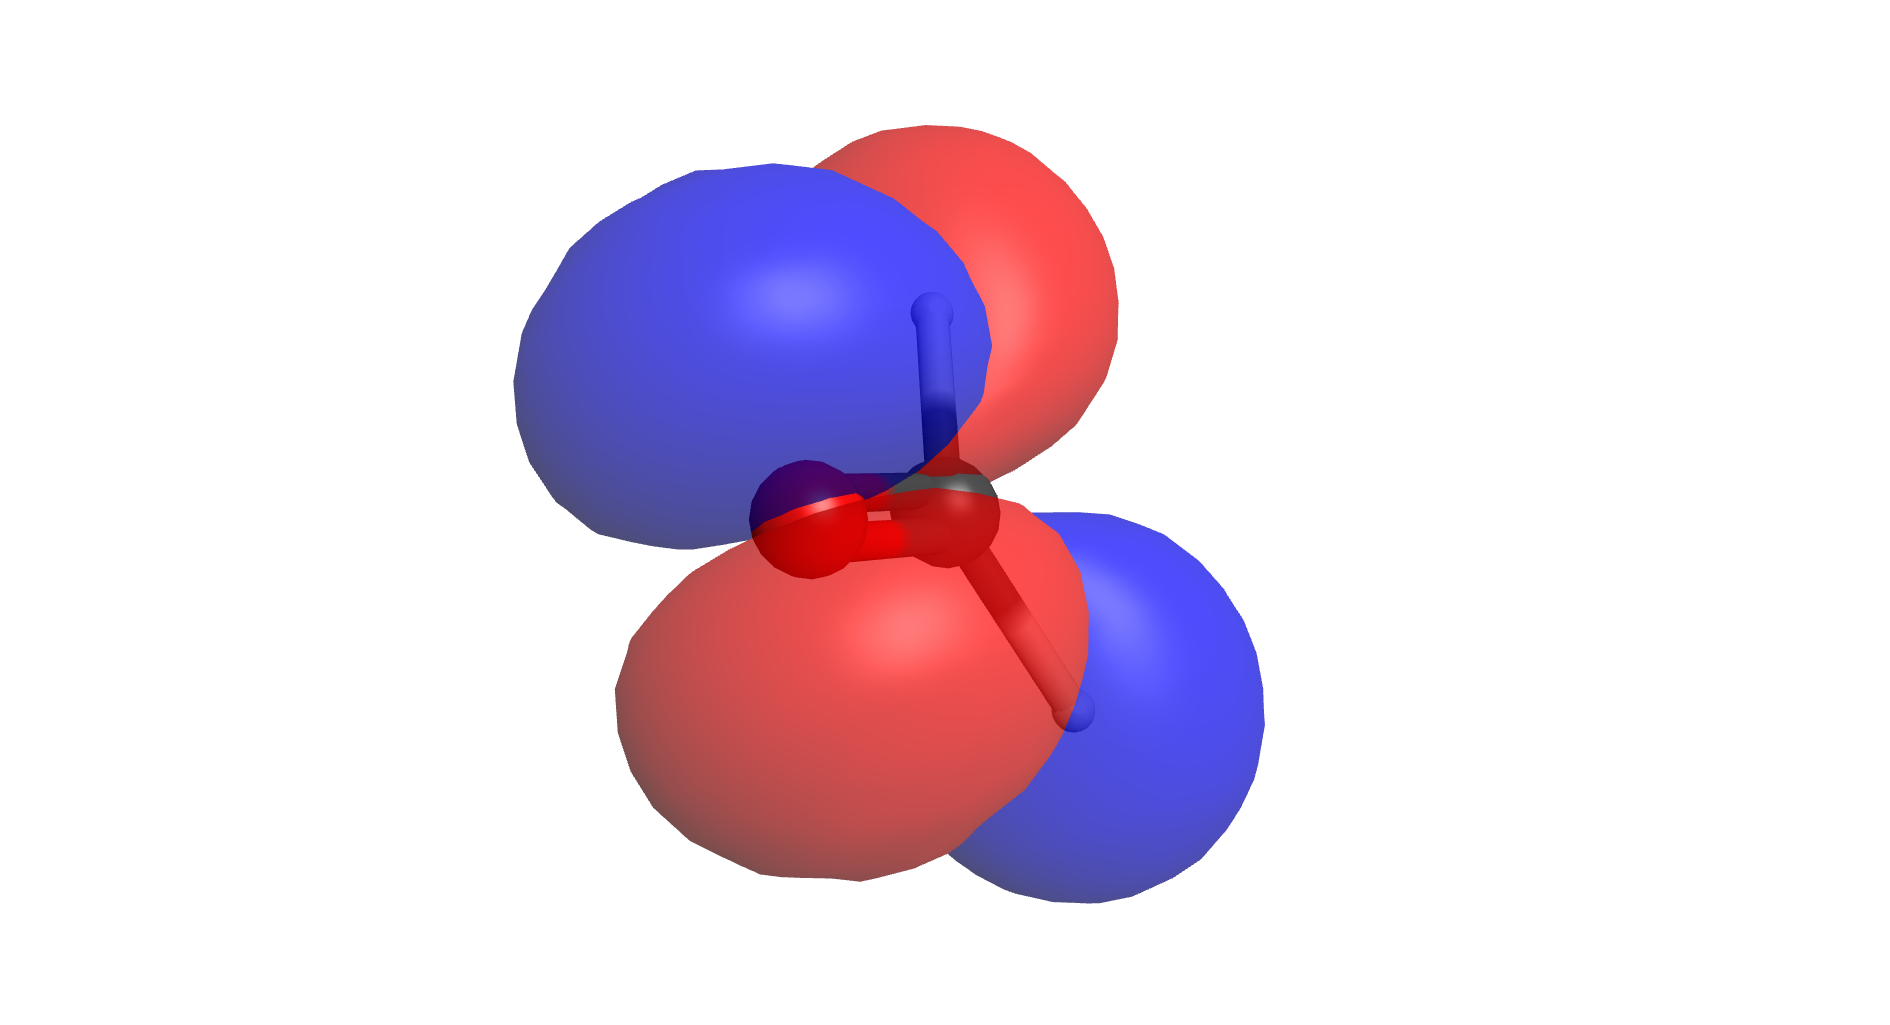

In [35]:
x = await rest.display_job_property(11, # job id
                                    "mo", # image type
                                    8, # orbital #
                                    width=1920, # width in pixels
                                    height=1080, # height in pixels
                                    transparent_background=True,
                                    rotate=(18,245,3) # desired rotation
                                   )
x